# Merge premise_code, item_code with price df for ALL months

Load item_code and premise_code data. Item_code and premise_code are fixed for all months

In [1]:
import numpy as np
import pandas as pd

URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/lookup_premise.parquet'
df_premise_code = pd.read_parquet(URL_DATA)
if 'date' in df_premise_code.columns: df_premise_code['date'] = pd.to_datetime(df_premise_code['date'])


URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/lookup_item.parquet'
df_item_code = pd.read_parquet(URL_DATA)
if 'date' in df_item_code.columns: df_item_code['date'] = pd.to_datetime(df_item_code['date'])



There is a difference between df['item'].nunique() and df['item_code'].nunique(). This is because although the item name ['item'] is the same, the unit is different . Example minyak Alif 1kg , minyak Alif 5kg, same name but different unit hence two different item_codes

The correct way is to use ['item_code'].unique()

In [54]:
print(len(df_item_code))
print(df_item_code['item'].nunique())

df_item_code[df_item_code["item"].duplicated(keep=False)]

757
710


,item_code,item,unit,item_group,item_category
76,190,SARDIN CAP AYAM (SOS TOMATO),155 g,BARANGAN BERBUNGKUS,IKAN DALAM TIN
77,191,SARDIN CAP AYAM (SOS TOMATO),425 g,BARANGAN BERBUNGKUS,IKAN DALAM TIN
78,192,SARDIN CAP KING CUP (SOS TOMATO),155 g,BARANGAN BERBUNGKUS,IKAN DALAM TIN
79,193,SARDIN CAP KING CUP (SOS TOMATO),425 g,BARANGAN BERBUNGKUS,IKAN DALAM TIN
80,195,MACKAREL CAP AYAM (SOS TOMATO),425 g,BARANGAN BERBUNGKUS,IKAN DALAM TIN
...,...,...,...,...,...
748,2012,KICAP TAMIN (DARK SOY SAUCE),350ml,BARANGAN BERBUNGKUS,KICAP DAN SOS
752,2016,SABUN SERBUK FAB (PERFECT),680g,PRODUK KEBERSIHAN,PENJAGAAN RUMAH
753,2017,DYNAMO POWER GEL (PERFECT CLEAN),2.6kg,PRODUK KEBERSIHAN,PENJAGAAN RUMAH
754,2018,SABUN PENCUCI SUNLIGHT (LEMON),900ml,PRODUK KEBERSIHAN,PENJAGAAN RUMAH


Load price data

In [2]:
def merge_data(df):

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning

    print(tempdf.head())
    #
    p =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["premise_type"])
    p.name = 'premise_type'


    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    q =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["premise"])
    q.name = 'premise'

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    s =tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')["state"])
    s.name = 'state'

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    t = tempdf.pop('premise_code').map(df_premise_code.set_index('premise_code')['district'])
    t.name = "district"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    u = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item'])
    u.name = "item"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    v = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['unit'])
    v.name = "unit"

    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    w = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item_category'])
    w.name = "item_category"

    
    tempdf = df.copy() #must make a copy . doing tempdf=df7 is just reassigning
    w2 = tempdf.pop('item_code').map(df_item_code.set_index('item_code')['item_group'])
    w2.name = "item_group"

    #print('S:\n',s) 
    #print('T:\n',t)

    df_merged = pd.concat([df,p,q,s,t,u,v,w,w2],axis=1)
    return df_merged    

In [3]:
import numpy as np
import pandas as pd
from datetime import datetime


#Get all months from Jan 22 until today
datelist = pd.date_range(start ='01/01/2022' , end = '09/30/2023',freq="M").tolist() #be careful. dates are mm/dd/yyyy
datelist = [x.strftime('%Y-%m') for x in datelist]
print(datelist)

def get_all_dataframes(datelist):
    
    df_list=[]

    for month_d in datelist:

        month_parq = month_d +'.parquet'
        URL_DATA = 'https://storage.googleapis.com/dosm-public-pricecatcher/pricecatcher_{}'.format(month_parq)
        
        df = pd.read_parquet(URL_DATA)
        if 'date' in df.columns: df['date'] = pd.to_datetime(df['date'])
        #df.head()
        df_list.append(df)
    
    return df_list

#This stores all price dataframes since Jan 22
df_all_list = get_all_dataframes(datelist)
print(f'Number of dataframes in the list: {len(df_all_list)}')


['2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09', '2022-10', '2022-11', '2022-12', '2023-01', '2023-02', '2023-03', '2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09']
Number of dataframes in the list: 21


In [4]:
df_all_list[19].head()

,date,premise_code,item_code,price
0,2023-08-01,2,1,9.4
1,2023-08-01,2,9,36.0
2,2023-08-01,2,16,5.5
3,2023-08-01,2,18,5.5
4,2023-08-01,2,20,5.0


In [ ]:
for i, df in enumerate(df_all_list):
    df_all_list[i] = merge_data(df_all_list[i])


Sanity check! below is an image not a code block!

![Alt text](image.png)

This should tally with the image above!

In [6]:
i=19
df_all_list[i].head() 

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category
0,2023-08-01,2,1,9.4,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,AYAM
1,2023-08-01,2,9,36.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,DAGING
2,2023-08-01,2,16,5.5,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,BETIK BIASA,1kg,BUAH-BUAHAN
3,2023-08-01,2,18,5.5,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,PISANG BERANGAN,1kg,BUAH-BUAHAN
4,2023-08-01,2,20,5.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,TEMBIKAI MERAH BERBIJI,1kg,BUAH-BUAHAN


# THIS IS THE MASTER DATAFRAME

Merge all price dataframes which has been mapped the item and premises into a master df

In [7]:
df_master = pd.DataFrame(columns=['date','premise_code','item_code','price','premise_type','premise','state','district','item','unit','item_category'])
#df_master.head()
for df in df_all_list:
    df_master = pd.concat([df_master,df])

df_master.head()    

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category
0,2022-01-01,2,1,9.1,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,AYAM
1,2022-01-01,2,9,36.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,DAGING
2,2022-01-01,2,14,24.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,DAGING KERBAU IMPORT (INDIA) * (TOP SIDE),1kg,DAGING
3,2022-01-01,2,16,4.3,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,BETIK BIASA,1kg,BUAH-BUAHAN
4,2022-01-01,2,18,4.5,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,PISANG BERANGAN,1kg,BUAH-BUAHAN


In [8]:
df_master.tail()

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category
1133809,2023-09-14,20895,1939,30.90,Pasar Raya / Supermarket,XR MART BANDAR,Terengganu,Kuala Terengganu,MINYAK MASAK TULEN CAP SAJI,5 kg,MINYAK DAN LEMAK
1133810,2023-09-14,20895,1941,13.30,Pasar Raya / Supermarket,XR MART BANDAR,Terengganu,Kuala Terengganu,MINYAK MASAK TULEN CAP ALIF,2 kg,MINYAK DAN LEMAK
1133811,2023-09-14,20895,1942,30.90,Pasar Raya / Supermarket,XR MART BANDAR,Terengganu,Kuala Terengganu,MINYAK MASAK TULEN CAP ALIF,5 kg,MINYAK DAN LEMAK
1133812,2023-09-14,20895,1945,0.79,Pasar Raya / Supermarket,XR MART BANDAR,Terengganu,Kuala Terengganu,TAUHU (JENIS KERAS),sekeping,TAUHU DAN TEMPE
1133813,2023-09-14,20895,1946,1.59,Pasar Raya / Supermarket,XR MART BANDAR,Terengganu,Kuala Terengganu,TEMPE (BUNGKUSAN PLASTIK),sekeping,TAUHU DAN TEMPE


In [9]:
#Sanity check
def sanity_df_master(df_master,df_all_list):

    length_df = []
    for df in df_all_list:
        x = len(df)
        length_df.append(x)

    y = sum(length_df)

    print(f'The lenght of each dataframes {length_df}')
    print(f'Sum of these lengths {y}')

    len_df_master = len(df_master)
    print('Sanity OK' if y-len_df_master==0 else 'sanity NOT OK')

    

sanity_df_master(df_master,df_all_list)


The lenght of each dataframes [2454101, 1862495, 2229720, 2221124, 1825607, 2183921, 2127471, 2664356, 2491398, 2570364, 2305506, 2467920, 2490227, 2248537, 2616040, 2200723, 2147504, 2414728, 2678825, 2414462, 1133814]
Sum of these lengths 47748843
Sanity OK


In [10]:
df_master.head()

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category
0,2022-01-01,2,1,9.1,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,AYAM
1,2022-01-01,2,9,36.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,DAGING
2,2022-01-01,2,14,24.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,DAGING KERBAU IMPORT (INDIA) * (TOP SIDE),1kg,DAGING
3,2022-01-01,2,16,4.3,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,BETIK BIASA,1kg,BUAH-BUAHAN
4,2022-01-01,2,18,4.5,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,PISANG BERANGAN,1kg,BUAH-BUAHAN


In [11]:
df_master['monthdate'] = df_master["date"].apply(lambda x: x.strftime('%Y-%m'))

In [12]:
df_master.sample(5)

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,monthdate
133078,2022-01-01,15959,1545,1.30,Pasar Mini,PASAR MINI YINN KEONG ENTERPRISE,Kedah,Yan,PERENCAH NASI GORENG IKAN BILIS SERI AJI,26G,REMPAH RATUS (BERBUNGKUS),2022-01
1239722,2023-04-16,5302,1440,4.00,Pasar Basah,PASAR JALAN GENTING KLANG,W.P. Kuala Lumpur,Wangsa Maju,BAWANG BESAR IMPORT (INDIA),1kg,BAWANG,2023-04
1543129,2022-10-20,2222,1553,18.00,Pasar Basah,PASAR JALAN PATANI,Pulau Pinang,Timur Laut,WHOLE LEG AYAM,1kg,AYAM,2022-10
1603115,2023-01-19,4664,83,15.00,Pasar Basah,PASAR SEJAHTERA,Sarawak,Limbang,IKAN TONGKOL/AYA/KAYU HITAM (ANTARA 1 HINGGA 2...,1kg,BAHAN LAUT,2023-01
1577688,2023-08-20,18492,1128,11.99,Pasar Raya / Supermarket,TARGET SUPERMARKET (BATU PAHAT) SDN BHD,Johor,Batu Pahat,LADA BENGGALA HIJAU (CAPSICUM),1kg,SAYUR-SAYURAN,2023-08


## One item, whole of Malaysia analysis

In [13]:
#cili kering 1899,1900
#bawang putih 1564
#ayam 1 kg 1
#bawang merah 131,132,1441,1442,1933
df_one_item = df_master[df_master["item_code"]==131]


In [14]:
print(len(df_one_item))
df_one_item.head()


260065


,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,monthdate
1628,2022-01-01,141,131,11.60,Pasar Raya / Supermarket,HUDA GROCER,Negeri Sembilan,Seremban,BAWANG KECIL MERAH ROSE IMPORT (INDIA),1kg,BAWANG,2022-01
2003,2022-01-01,176,131,17.98,Hypermarket,LOTUS'S CHERAS,W.P. Kuala Lumpur,Cheras,BAWANG KECIL MERAH ROSE IMPORT (INDIA),1kg,BAWANG,2022-01
2798,2022-01-01,261,131,17.98,Hypermarket,TESCO SEREMBAN 2,Negeri Sembilan,Seremban,BAWANG KECIL MERAH ROSE IMPORT (INDIA),1kg,BAWANG,2022-01
4220,2022-01-01,361,131,20.00,Pasar Basah,PASAR UTAMA BINTULU,Sarawak,Bintulu,BAWANG KECIL MERAH ROSE IMPORT (INDIA),1kg,BAWANG,2022-01
4328,2022-01-01,365,131,23.50,Pasar Raya / Supermarket,HAP HUAT SUPERSTORE,W.P. Labuan,Kawasan Luar Bandar,BAWANG KECIL MERAH ROSE IMPORT (INDIA),1kg,BAWANG,2022-01


In [15]:
#Select item i.e ayam
#Select monthdate i.e aug 23
#compute max,min, mean

#df_one_item = df_master[df_master["item_code"]==131]

g_ayam =df_one_item.groupby(by=["monthdate"])
df_price_change_byitem = []
for mthdate in df_one_item["monthdate"].unique():
    x_df = df_one_item[df_one_item["monthdate"]==mthdate]
    max_x = x_df["price"].max()
    min_x = x_df["price"].min()
    mean_x = x_df["price"].mean()

    df_price_change_byitem.append([mthdate,max_x,min_x,mean_x])

print(len(x_df))
x_df.head()

df_price_change_byitem = pd.DataFrame(df_price_change_byitem,columns=['monthdate','max','min','mean'])
df_price_change_byitem.head(20)

6754


,monthdate,max,min,mean
0,2022-01,35.0,5.00,18.274390
1,2022-02,38.0,5.00,17.441990
2,2022-03,38.0,3.79,11.655923
3,2022-04,26.0,2.99,9.082419
4,2022-05,22.9,1.99,7.761848
5,2022-06,26.8,1.99,6.831655
6,2022-07,18.9,1.90,6.551848
7,2022-08,18.9,0.99,6.443268
8,2022-09,18.0,0.48,6.173921
9,2022-10,15.0,0.99,6.261885


![Alt text](image-1.png)

![Alt text](image-3.png)

<Axes: xlabel='monthdate'>

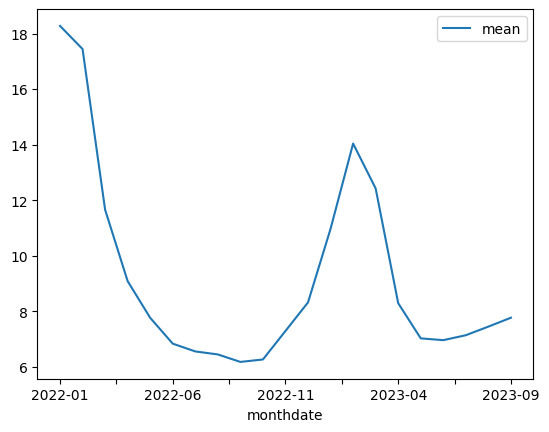

In [16]:
#df_price_change_byitem.plot.line(x='monthdate',y=['max','min','mean'])
df_price_change_byitem.plot.line(x='monthdate',y='mean')



![Alt text](image-4.png)

In [17]:

df_all_list[-2].head()


,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category
0,2023-08-01,2,1,9.4,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,AYAM
1,2023-08-01,2,9,36.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,DAGING
2,2023-08-01,2,16,5.5,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,BETIK BIASA,1kg,BUAH-BUAHAN
3,2023-08-01,2,18,5.5,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,PISANG BERANGAN,1kg,BUAH-BUAHAN
4,2023-08-01,2,20,5.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,TEMBIKAI MERAH BERBIJI,1kg,BUAH-BUAHAN


In [18]:
df_all_list[-2]["item_code"].nunique()

501

In [19]:
df_master.head()

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,monthdate
0,2022-01-01,2,1,9.1,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,AYAM,2022-01
1,2022-01-01,2,9,36.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,DAGING KAMBING BEBIRI IMPORT BERTULANG (MUTTON...,1kg,DAGING,2022-01
2,2022-01-01,2,14,24.0,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,DAGING KERBAU IMPORT (INDIA) * (TOP SIDE),1kg,DAGING,2022-01
3,2022-01-01,2,16,4.3,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,BETIK BIASA,1kg,BUAH-BUAHAN,2022-01
4,2022-01-01,2,18,4.5,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,PISANG BERANGAN,1kg,BUAH-BUAHAN,2022-01


## Many Items, whole of Malaysia

In [63]:
y  = df_master[df_master["item_code"]==1]

mthlist = y["monthdate"].unique()

y = y[y["monthdate"]==mthlist[0]]


In [64]:
y.head()

,date,premise_code,item_code,price,premise_type,premise,state,district,item,unit,item_category,monthdate
0,2022-01-01,2,1,9.10,Pasar Basah,PASAR BESAR IPOH,Perak,Kinta,AYAM BERSIH - STANDARD,1kg,AYAM,2022-01
932,2022-01-01,16,1,8.90,Pasar Raya / Supermarket,PASARAYA K-CERIA (KANGAR) SDN. BHD,Perlis,Kangar,AYAM BERSIH - STANDARD,1kg,AYAM,2022-01
1152,2022-01-01,115,1,8.30,Pasar Raya / Supermarket,TAMPIN SHOPPING CENTRE,Negeri Sembilan,Tampin,AYAM BERSIH - STANDARD,1kg,AYAM,2022-01
1386,2022-01-01,136,1,8.99,Pasar Raya / Supermarket,THE STORE ( PUDU PLAZA ),W.P. Kuala Lumpur,Cheras,AYAM BERSIH - STANDARD,1kg,AYAM,2022-01
1611,2022-01-01,141,1,8.60,Pasar Raya / Supermarket,HUDA GROCER,Negeri Sembilan,Seremban,AYAM BERSIH - STANDARD,1kg,AYAM,2022-01


In [76]:
#Select item i.e ayam
#Select monthdate i.e aug 23
#compute max,min, mean

#df_one_item = df_master[df_master["item_code"]==131]

df_price_change_ALLitems = []

#Extract item_code and monthdate data
item_c_list  = df_all_list[-1]["item_code"].unique() #take the list of items from the latest price dataframe
mthdate_list = df_master["monthdate"].unique() #tae the list of monthdates from df_master as this a combined df since jan22


for item_c in item_c_list:

    #Select ONE item
    x_df = df_master[df_master["item_code"]==item_c]

    x_index = x_df.index

    item = x_df.at[x_index[0],"item"]
    unit = x_df.at[x_index[0],"unit"]

    for mthdate in mthdate_list:
        
        #Select ONE monthdate
        x_df = x_df[x_df["monthdate"]==mthdate]

        max_x = x_df["price"].max()
        min_x = x_df["price"].min()
        mean_x = x_df["price"].mean()

        df_price_change_ALLitems.append([item_c,item,unit,mthdate,max_x,min_x,mean_x])

print(len(x_df))
x_df.head()

df_price_change_ALLitems = pd.DataFrame(df_price_change_ALLitems,columns=['item_code','item','unit','monthdate','max','min','mean'])
df_price_change_ALLitems.head()

0


,item_code,item,unit,monthdate,max,min,mean
0,1,0 AYAM BERSIH - STANDARD 0 AYAM BERSIH -...,0 1kg 0 1kg 0 1kg 0 1kg 0 1kg 0...,2022-01,11.0,4.99,8.868708
1,1,0 AYAM BERSIH - STANDARD 0 AYAM BERSIH -...,0 1kg 0 1kg 0 1kg 0 1kg 0 1kg 0...,2022-02,NaN,NaN,NaN
2,1,0 AYAM BERSIH - STANDARD 0 AYAM BERSIH -...,0 1kg 0 1kg 0 1kg 0 1kg 0 1kg 0...,2022-03,NaN,NaN,NaN
3,1,0 AYAM BERSIH - STANDARD 0 AYAM BERSIH -...,0 1kg 0 1kg 0 1kg 0 1kg 0 1kg 0...,2022-04,NaN,NaN,NaN
4,1,0 AYAM BERSIH - STANDARD 0 AYAM BERSIH -...,0 1kg 0 1kg 0 1kg 0 1kg 0 1kg 0...,2022-05,NaN,NaN,NaN


# THIS IS THE MASTER DF FOR PRICE CHANGES ALL ITEMS SINCE JAN 22-for whole malaysia. not district level data here.

In [108]:
#Select item i.e ayam
#Select monthdate i.e aug 23
#compute max,min, mean

#df_one_item = df_master[df_master["item_code"]==131]

df_price_change_ALLitems = []

#Extract item_code and monthdate data
item_c_list  = df_all_list[-1]["item_code"].unique() #take the list of items from the latest price dataframe
mthdate_list = df_master["monthdate"].unique() #take the list of monthdates from df_master as this a combined df since jan22

i=1
for item_c in item_c_list:

    #Select ONE item
    x_df = df_master[df_master["item_code"]==item_c]
    x_index = x_df.index


    #Get ONE item details
    item = x_df["item"].unique()
    item = item[0]
    unit = x_df["unit"].unique()
    unit = unit[0]

    #print(f'{i}. item:{item} unit:{unit}')
    
    
    for mthdate in mthdate_list:
        
        #Select ONE monthdate
        y_df = x_df[x_df["monthdate"]==mthdate]
        
        if y_df.empty:
            #print('ONE ITEM DF IS EMPTY~~')
            print(f'ONE ITEM DF IS EMPTY!!~~ {i}. item_c:{item_c} item:{item} unit:{unit} mthdate:{mthdate}')

        else:

            #print(f'{i}. item:{item} unit:{unit} mthdate:{mthdate}')
            print(i)

            max_y = y_df["price"].max()
            min_y = y_df["price"].min()
            mean_y = y_df["price"].mean()

            df_price_change_ALLitems.append([item_c,item,unit,mthdate,max_y,min_y,mean_y])
    i+=1

    
    
print(len(x_df))
x_df.head()

df_price_change_ALLitems = pd.DataFrame(df_price_change_ALLitems,columns=['item_code','item','unit','monthdate','max','min','mean'])
df_price_change_ALLitems.head()


1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
1

,item_code,item,unit,monthdate,max,min,mean
0,1,AYAM BERSIH - STANDARD,1kg,2022-01,11.0,4.99,8.868708
1,1,AYAM BERSIH - STANDARD,1kg,2022-02,11.0,6.80,8.823519
2,1,AYAM BERSIH - STANDARD,1kg,2022-03,10.8,3.99,8.793587
3,1,AYAM BERSIH - STANDARD,1kg,2022-04,11.5,5.99,8.752917
4,1,AYAM BERSIH - STANDARD,1kg,2022-05,12.0,5.99,8.839873


In [109]:
df_price_change_ALLitems.to_csv('df_price_change_ALLitems.csv')

In [110]:
len(df_price_change_ALLitems)

9884

<Axes: title={'center': 'BAWANG PUTIH IMPORT (CHINA) 1kg'}, xlabel='monthdate'>

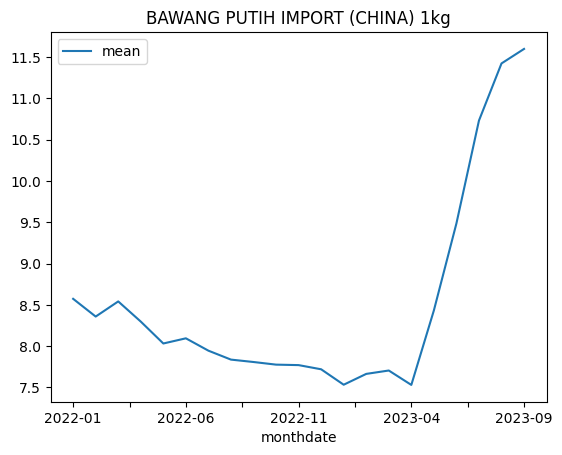

In [158]:
#cili kering 1899,1900
#bawang putih 1564
#ayam 1 kg 1
#bawang merah 131,132,1441,1442,1933

i = 1564

#df_plot = df_price_change_ALLitems[df_price_change_ALLitems["item_code"]==item_c_list[i]]
df_plot = df_price_change_ALLitems[df_price_change_ALLitems["item_code"]==i]

item_name = df_plot["item"].unique()
item_name = item_name[0]

item_unit = df_plot["unit"].unique()
item_unit = item_unit[0]

title_plot = item_name + ' ' + item_unit

df_plot.plot.line(x="monthdate",y="mean", title=title_plot)

